In [2]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

In [7]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(12, 8))
plt.rc('font', size=14)

In [11]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

In [14]:
data = sm.datasets.star98.load(as_pandas=False)
data.exog = sm.add_constant(data.exog, prepend=False)

In [21]:
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.6
Date:                Thu, 13 Aug 2020   Deviance:                       4078.8
Time:                        14:49:39   Pearson chi2:                 4.05e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.000    -38.749      0.0

In [40]:
print(f'Total number of trials: {data.endog[0].sum()}')
print(f'Parameters: {res.params}')
print(f'T-values: {res.tvalues}')

Total number of trials: 807.0
Parameters: [-1.68150366e-02  9.92547661e-03 -1.87242148e-02 -1.42385609e-02
  2.54487173e-01  2.40693664e-01  8.04086739e-02 -1.95216050e+00
 -3.34086475e-01 -1.69022168e-01  4.91670212e-03 -3.57996435e-03
 -1.40765648e-02 -4.00499176e-03 -3.90639579e-03  9.17143006e-02
  4.89898381e-02  8.04073890e-03  2.22009503e-04 -2.24924861e-03
  2.95887793e+00]
T-values: [-38.74908321  16.50473627 -25.1821894  -32.81791308   8.49827113
   4.21247925   5.7749976   -6.16191078  -5.45321673  -5.16865445
   3.92119964 -15.87825999  -7.39093058  -8.44963886  -4.05916246
   6.3210987    6.57434662   5.36229044   7.42806363  -6.44513698
   1.91301155]


In [85]:
means = data.exog.mean(axis=0)
means25 = means.copy()
means25[0] = stats.scoreatpercentile(data.exog[:, 0], 25)
means75 = means.copy()
means75[0] = stats.scoreatpercentile(data.exog[:, 0], 75)
resp_25 = res.predict(means25)[0]
resp_75 = res.predict(means75)[0]
diff = resp_75 - resp_25
print(f'{diff*100:.4f}%')

-11.8753%


In [101]:
nobs = res.nobs
y = data.endog[:, 0]/data.endog.sum(axis=1)
yhat = res.mu

In [102]:
from statsmodels.graphics.api import abline_plot

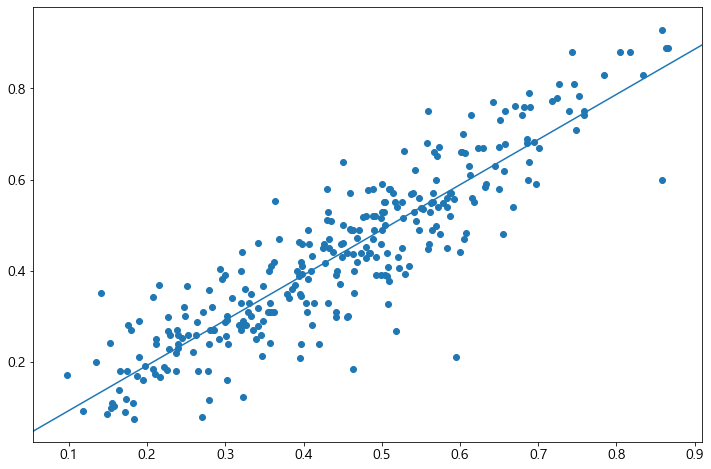

In [108]:
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
plt.show()

In [294]:
nobs2 = 100
x = np.arange(nobs2)
np.random.seed(54321)
X = np.column_stack((x, x**2))
X = sm.add_constant(X, prepend=False)
lny = np.exp(-(.03*x + .0001*x**2 - 1.0)) + .001 * np.random.rand(nobs2)

In [251]:
olsmod = sm.OLS(lny, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7540.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):          3.73e-107
Time:                        15:54:38   Log-Likelihood:                 140.11
No. Observations:                 100   AIC:                            -274.2
Df Residuals:                      97   BIC:                            -266.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0601      0.001    -72.318      0.0

In [295]:
nobs = 100
check1 = (X@olsres.params == olsres.predict(X)).all()
check2 = X.shape[0] == nobs
check1, check2

(True, True)

In [285]:
yhat = olsres.predict(X)
SS_tot = sum((lny-lny.mean())**2)
SS_reg = sum((yhat-lny.mean())**2)
SS_res = sum((lny-yhat)**2)
rsquared = 1-SS_res/SS_tot
check3 = rsquared == olsres.rsquared

p = X.shape[1] - 1
rsquared_adj = 1-(1-rsquared)*(nobs-1)/(nobs-p-1)
check4 = rsquared_adj == olsres.rsquared_adj
check3, check4

(True, True)

In [305]:
check5 = all((lny-yhat) == olsres.resid)
check5

True

In [356]:
e = lny-yhat
d = sum((e[1:]-e[:-1])**2)/sum(e**2)
check6 = np.allclose(sm.stats.stattools.durbin_watson(e), d)
check6

True